In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import numpy as np
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter, DateLocator, DayLocator, HourLocator
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline

## Chiffres globaux

In [2]:
nominal = pd.read_csv('/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/data_extraction/intermittence/buses_formatted_with_capacity_and_ASUpower_and_IsEurope.csv', index_col=0)
nominal.describe()

,bus_id,station_id,voltage,lon,lat,electrical_capacity_solar,electrical_capacity_wind,Nominal_Power_ASU
count,7893.00000,7893.00000,7893.000000,7893.000000,7893.000000,7893.000000,7893.000000,7893.000000
mean,3947.00000,4350.30356,271.259090,14.235294,46.132944,10.926048,24.425747,0.028971
std,2278.65717,2472.29725,98.226031,16.279861,8.699818,42.941670,194.371727,0.438654
min,1.00000,2.00000,0.000000,-23.148193,21.667639,0.000000,0.000000,0.000000
25%,1974.00000,2336.00000,220.000000,1.604004,40.430224,0.000000,0.000000,0.000000
50%,3947.00000,4160.00000,220.000000,10.063477,46.558860,0.000000,0.000000,0.000000
75%,5920.00000,6490.00000,380.000000,25.125732,51.984880,0.697840,0.000000,0.000000
max,7893.00000,8701.00000,750.000000,67.313232,70.363091,780.673480,8926.880000,15.259776


In [3]:
bus_eu = nominal.loc[nominal['is_in_europe'] == True]['bus_id'].tolist()
nominal_eu = nominal[nominal['bus_id'].isin(bus_eu)]
nominal_eu.describe()

,bus_id,station_id,voltage,lon,lat,electrical_capacity_solar,electrical_capacity_wind,Nominal_Power_ASU
count,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000
mean,4405.206396,4827.416190,279.582265,13.248208,48.651766,13.288146,29.693514,0.035305
std,2075.081398,2268.930049,98.219456,15.375263,6.685175,47.007727,214.257107,0.484158
min,14.000000,19.000000,0.000000,-9.437256,36.049099,0.000000,0.000000,0.000000
25%,2859.000000,3182.000000,220.000000,1.296387,43.317185,0.000000,0.000000,0.000000
50%,4477.000000,4812.000000,220.000000,9.503174,48.261256,0.000000,0.000000,0.000000
75%,6134.000000,6827.000000,380.000000,22.075733,53.008173,2.527960,2.500000,0.000000
max,7893.000000,8701.000000,750.000000,61.622314,70.363091,780.673480,8926.880000,15.259776


In [4]:
len(nominal)-len(nominal_eu) # On perd tant de bus en ne sélectionnant que l'européen

1420

In [5]:
nominal_pv = nominal_eu.sum()['electrical_capacity_solar'] #en MW
nominal_pv

86014.16907000008

In [6]:
nominal_wind = nominal_eu.sum()['electrical_capacity_wind'] #en MW
nominal_wind

192206.117

In [7]:
nominal_cons = nominal_eu.sum()['Nominal_Power_ASU'] #en MW
nominal_cons

228.52964091008434

## Création des tables temporelles de puissance réelle

In [8]:
if os.getcwd()[:10] == '/Users/flo':
    path_wind = '/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/data_extraction/intermittence/outputs/wind'
    path_pv = '/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/data_extraction/intermittence/outputs/pv'
else:
    path = 'C:/Users/sebsa/Documents/Centrale Paris/3A/OEN/Projet Synthese/data/installed_capacity/Wind/Extraction The Wind Power'

#### Wind

In [9]:
wind_busnames = os.listdir(path_wind)
wind_busnames.remove('.DS_Store')
to_compare = pd.read_csv('/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/data_extraction/intermittence/buses_formatted_with_capacity_and_ASUpower_and_IsEurope.csv', index_col=0)
wind_prod = pd.read_csv(path_wind + '/' + wind_busnames[0], index_col=0)

In [10]:
#creates the list of wind buses situated in EU
wind_busnames_eu = [val for val in bus_eu if val in [float(j) for j in [i[:-6] for i in wind_busnames]]]
wind_busnames_eu = ['{:.1f}'.format(x) for x in wind_busnames_eu]
wind_busnames_eu = [i + '.csv' for i in wind_busnames_eu]

In [11]:
#iterates to sum the real wind powers 
for bus in wind_busnames_eu[1:]:
    if bus != '.DS_Store':
        test = pd.read_csv(path_wind + '/' + bus, index_col=0)['output']
        wind_prod['output'] = wind_prod['output'].add(test)

In [12]:
del wind_prod['new_output'], wind_prod['local_time']

#### pv

In [13]:
pv_busnames = os.listdir(path_pv)
pv_busnames.remove('.DS_Store')
pv_prod = pd.read_csv(path_pv + '/' + pv_busnames[0], index_col=0)

In [14]:
pv_busnames_eu = [val for val in bus_eu if val in [float(j) for j in [i[:-6] for i in pv_busnames]]]
pv_busnames_eu = ['{:.1f}'.format(x) for x in pv_busnames_eu]
pv_busnames_eu = [i + '.csv' for i in pv_busnames_eu]

In [15]:
#iterates to sum the real pv powers 
for bus in pv_busnames_eu[1:]:
    if bus != '.DS_Store':
        test = pd.read_csv(path_pv + '/' + bus, index_col=0)['output']
        pv_prod['output'] = pv_prod['output'].add(test)

In [16]:
del pv_prod['diffuse'], pv_prod['temperature'], pv_prod['direct'], pv_prod['new_output'], pv_prod['local_time']

In [17]:
#wind_prod.to_csv('/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/data_extraction/intermittence/outputs/wind_prod.csv')
#pv_prod.to_csv('/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/data_extraction/intermittence/outputs/pv_prod.csv')

In [18]:
pv_prod

,time,output
2,2016-01-01 00:00,0.000000e+00
3,2016-01-01 01:00,0.000000e+00
4,2016-01-01 02:00,0.000000e+00
5,2016-01-01 03:00,0.000000e+00
6,2016-01-01 04:00,0.000000e+00
7,2016-01-01 05:00,0.000000e+00
8,2016-01-01 06:00,1.134072e+05
9,2016-01-01 07:00,2.044219e+06
10,2016-01-01 08:00,6.481218e+06
11,2016-01-01 09:00,1.204073e+07


## Tracé des courbes

### Création d'une table commune

In [19]:
#wind_prod = pd.read_csv('/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/data_extraction/intermittence/outputs/wind_prod.csv', index_col=0)
#pv_prod = pd.read_csv('/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/data_extraction/intermittence/outputs/pv_prod.csv', index_col=0)

In [20]:
wind_prod['time'] = pd.to_datetime(wind_prod['time'])
pv_prod['time'] = pd.to_datetime(pv_prod['time'])

In [21]:
wind_prod['output'] = wind_prod['output'] / 1e+06
wind_prod.columns = ["time", "wind_prod (GW)"]
pv_prod['output'] = pv_prod['output'] / 1e+06
pv_prod.columns = ["time", "pv_prod (GW)"]

In [22]:
consumption = wind_prod[['time']].copy()
consumption['cons (GW)'] = nominal_cons /1000

In [23]:
consumption

,time,cons (GW)
2,2016-01-01 00:00:00,0.22853
3,2016-01-01 01:00:00,0.22853
4,2016-01-01 02:00:00,0.22853
5,2016-01-01 03:00:00,0.22853
6,2016-01-01 04:00:00,0.22853
7,2016-01-01 05:00:00,0.22853
8,2016-01-01 06:00:00,0.22853
9,2016-01-01 07:00:00,0.22853
10,2016-01-01 08:00:00,0.22853
11,2016-01-01 09:00:00,0.22853


In [24]:
global_pandc = pd.merge(wind_prod, pv_prod, on='time', how='inner')
global_pandc = pd.merge(consumption, global_pandc, on='time', how='inner')
global_pandc

,time,cons (GW),wind_prod (GW),pv_prod (GW)
0,2016-01-01 00:00:00,0.22853,77.089128,0.000000
1,2016-01-01 01:00:00,0.22853,71.894266,0.000000
2,2016-01-01 02:00:00,0.22853,66.737405,0.000000
3,2016-01-01 03:00:00,0.22853,60.998004,0.000000
4,2016-01-01 04:00:00,0.22853,55.747398,0.000000
5,2016-01-01 05:00:00,0.22853,52.737724,0.000000
6,2016-01-01 06:00:00,0.22853,51.691078,0.113407
7,2016-01-01 07:00:00,0.22853,51.316665,2.044219
8,2016-01-01 08:00:00,0.22853,52.039042,6.481218
9,2016-01-01 09:00:00,0.22853,53.411636,12.040728


In [25]:
global_pandc['total_prod (GW)'] = global_pandc['wind_prod (GW)'] + global_pandc['pv_prod (GW)']
global_pandc['poids_wind (%)'] = global_pandc['cons (GW)'] / global_pandc['wind_prod (GW)'] *100
global_pandc['poids_pv (%)'] = global_pandc['cons (GW)'] / global_pandc['pv_prod (GW)'] * 100
global_pandc['poids_total (%)'] = global_pandc['cons (GW)'] / global_pandc['total_prod (GW)'] * 100
global_pandc.replace([np.inf, -np.inf], np.nan)
del global_pandc['poids_wind (%)'], global_pandc['poids_pv (%)']
#global_pandc.to_csv('/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/data_extraction/intermittence/outputs/global_prodandcons.csv')

In [26]:
global_pandc.describe()

,cons (GW),wind_prod (GW),pv_prod (GW),total_prod (GW),poids_total (%)
count,8.784000e+03,8784.000000,8784.000000,8784.000000,8784.000000
mean,2.285296e-01,70.200613,13.961356,84.161969,0.306752
std,4.438369e-14,24.357784,19.020023,28.586685,0.113341
min,2.285296e-01,18.176177,0.000000,24.509196,0.124433
25%,2.285296e-01,52.506044,0.000000,61.557665,0.219831
50%,2.285296e-01,66.192355,0.829471,80.480354,0.283957
75%,2.285296e-01,85.034689,26.951496,103.957153,0.371245
max,2.285296e-01,147.686003,71.216388,183.656386,0.932424


### Statistiques intermittence et poids AL

In [27]:
global_pandc['wind_prod (GW)'].describe()['mean']/(nominal_wind/1000) # intermittence moyenne éolien

0.365236102358932

In [28]:
global_pandc['pv_prod (GW)'].describe()['mean']/(nominal_pv/1000) # intermittence moyenne pv

0.16231460330019734

In [29]:
global_pandc['total_prod (GW)'].describe()['mean']/((nominal_pv+nominal_wind)/1000) # intermittence moyenne renew

0.30250119407986947

In [30]:
poids = global_pandc['poids_total (%)'].describe()['75%']
global_pandc['poids_total (%)'].describe()

count    8784.000000
mean        0.306752
std         0.113341
min         0.124433
25%         0.219831
50%         0.283957
75%         0.371245
max         0.932424
Name: poids_total (%), dtype: float64

In [31]:
#get the row where weight is max
global_pandc['time'][4924]

Timestamp('2016-07-24 04:00:00')

In [32]:
high_weight = global_pandc[global_pandc['poids_total (%)'] > 0.5]
high_weight

,time,cons (GW),wind_prod (GW),pv_prod (GW),total_prod (GW),poids_total (%)
459,2016-01-20 03:00:00,0.22853,45.210017,0.000000,45.210017,0.505485
460,2016-01-20 04:00:00,0.22853,43.691532,0.000000,43.691532,0.523052
461,2016-01-20 05:00:00,0.22853,43.318910,0.000000,43.318910,0.527552
462,2016-01-20 06:00:00,0.22853,43.101414,0.359978,43.461392,0.525822
471,2016-01-20 15:00:00,0.22853,35.484462,4.405766,39.890228,0.572896
472,2016-01-20 16:00:00,0.22853,36.595032,0.270399,36.865431,0.619902
473,2016-01-20 17:00:00,0.22853,36.910355,0.000062,36.910417,0.619147
474,2016-01-20 18:00:00,0.22853,36.736232,0.000000,36.736232,0.622082
475,2016-01-20 19:00:00,0.22853,36.488917,0.000000,36.488917,0.626299
476,2016-01-20 20:00:00,0.22853,36.562323,0.000000,36.562323,0.625041


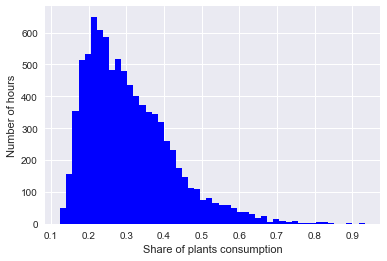

In [33]:
plt.hist(global_pandc['poids_total (%)'], 50, facecolor='blue', alpha=1)
plt.xlabel('Share of plants consumption')
plt.ylabel("Number of hours")
plt.show()

## Données d'intermittence

### Tracé des courbes annuelles

#### Prod

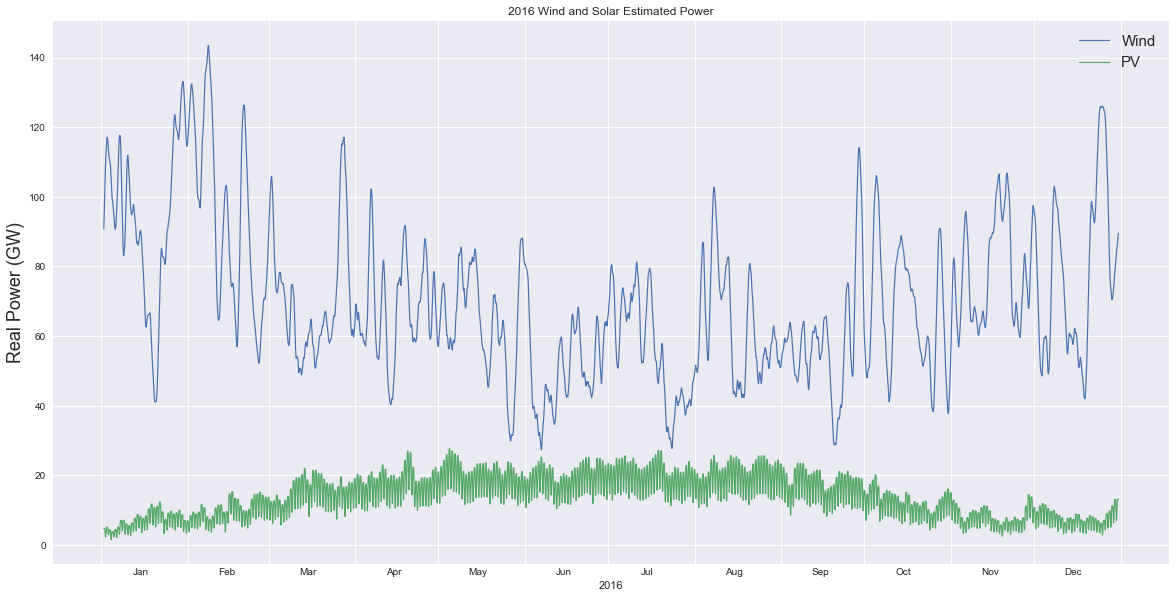

In [44]:
x = global_pandc['time']
y = global_pandc['wind_prod (GW)'].rolling(40, center = True).mean()
z = global_pandc['pv_prod (GW)'].rolling(40, center = True).mean()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y, label='Wind', linewidth=1.2)
ax.plot(x, z, label='PV', linewidth=1.2)

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(DateFormatter('%b'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
    
ax.set_xlabel('2016')
ax.xaxis.get_minor_ticks()[0].label1.set_visible(False)
ax.xaxis.get_minor_ticks()[-1].label1.set_visible(False)
ax.autoscale_view()


plt.style.use('seaborn')
plt.title('2016 Wind and Solar Estimated Power')
plt.ylabel("Real Power (GW)", fontsize=18)
ax.legend(prop={'size': 15})
plt.show()
fig.savefig('/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/outputs_report/wind_prod.pdf')

#### Prod totale et conso

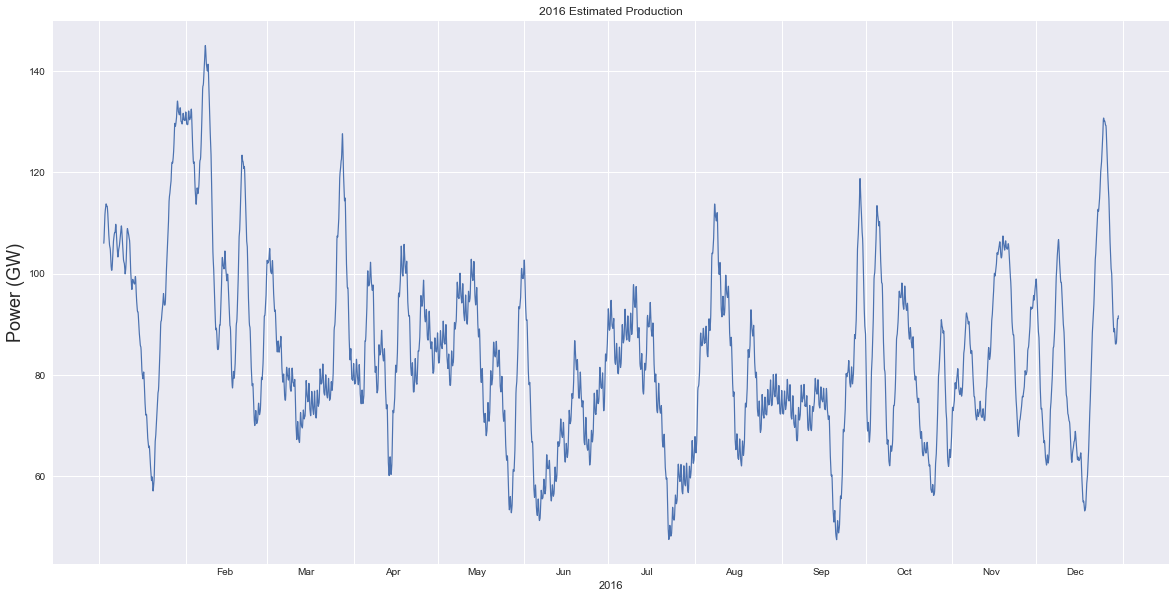

In [45]:
x = global_pandc['time']
y = global_pandc['total_prod (GW)'].rolling(80, center = True).mean()
z = global_pandc['cons (GW)'].rolling(40, center = True).mean()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y, label='Production', linewidth=1.2)
#ax.plot(x, z, label='Consumption', linewidth=1)

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(DateFormatter('%b'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
    
ax.set_xlabel('2016')
ax.xaxis.get_minor_ticks()[0].label1.set_visible(False)
ax.xaxis.get_minor_ticks()[-1].label1.set_visible(False)
ax.autoscale_view()


plt.style.use('seaborn')
plt.title('2016 Estimated Production')
plt.ylabel("Power (GW)", fontsize=18)
#ax.legend(prop={'size': 15})
plt.show()
fig.savefig('/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/outputs_report/wind_prod.pdf')

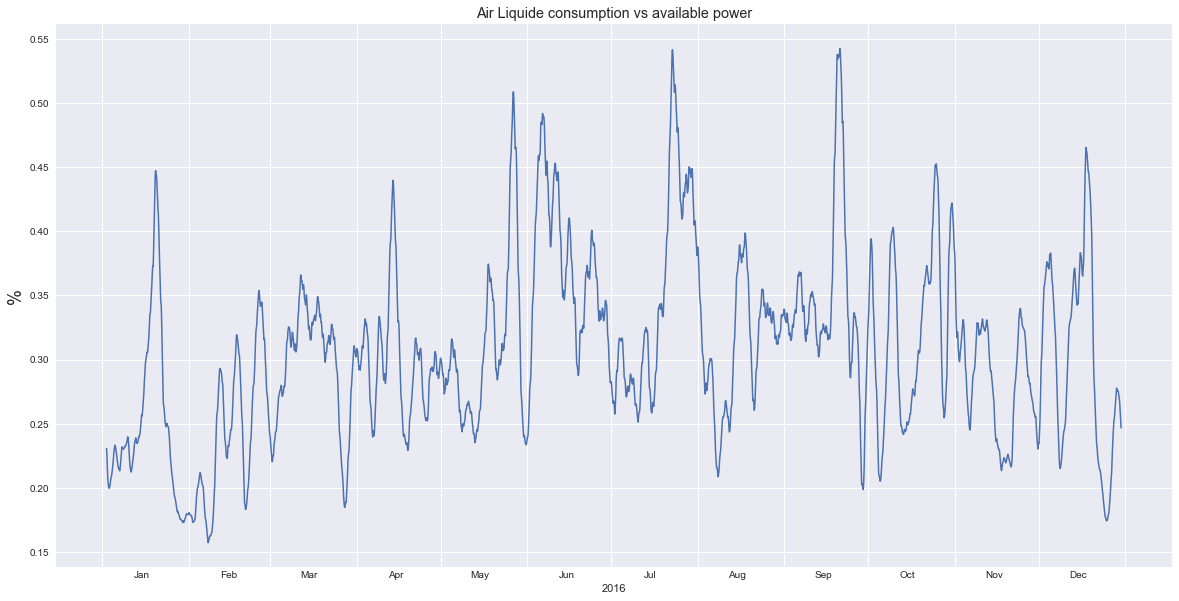

In [47]:
x = global_pandc['time']
y = global_pandc['poids_total (%)'].rolling(70, center = True).mean()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y, linewidth=1.5)

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(DateFormatter('%b'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
    
ax.set_xlabel('2016')
#ax.xaxis.get_minor_ticks()[0].label1.set_visible(False)
ax.xaxis.get_minor_ticks()[-1].label1.set_visible(False)
ax.autoscale_view()


plt.style.use('ggplot')
plt.title('Air Liquide consumption vs available power')
plt.ylabel("%", fontsize=18)
plt.show()
fig.savefig('/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/outputs_report/wind_prod.pdf')

### Tracé de courbes hebdomadaires

In [48]:
w_global_pandc = global_pandc.loc[(global_pandc['time'] >= datetime.date(2016, 7, 18)) & (global_pandc['time'] < datetime.date(2016, 7, 25))]
w_global_pandc

,time,cons (GW),wind_prod (GW),pv_prod (GW),total_prod (GW),poids_total (%)
4776,2016-07-18 00:00:00,0.22853,56.113808,0.000000,56.113808,0.407261
4777,2016-07-18 01:00:00,0.22853,55.549625,0.000000,55.549625,0.411397
4778,2016-07-18 02:00:00,0.22853,54.621697,0.000000,54.621697,0.418386
4779,2016-07-18 03:00:00,0.22853,52.417719,0.005617,52.423336,0.435931
4780,2016-07-18 04:00:00,0.22853,48.617040,0.602930,49.219970,0.464303
4781,2016-07-18 05:00:00,0.22853,44.405262,7.752936,52.158198,0.438147
4782,2016-07-18 06:00:00,0.22853,40.609296,21.679511,62.288808,0.366887
4783,2016-07-18 07:00:00,0.22853,40.864187,36.896603,77.760789,0.293888
4784,2016-07-18 08:00:00,0.22853,43.348643,49.526057,92.874700,0.246062
4785,2016-07-18 09:00:00,0.22853,46.031014,58.537548,104.568562,0.218545


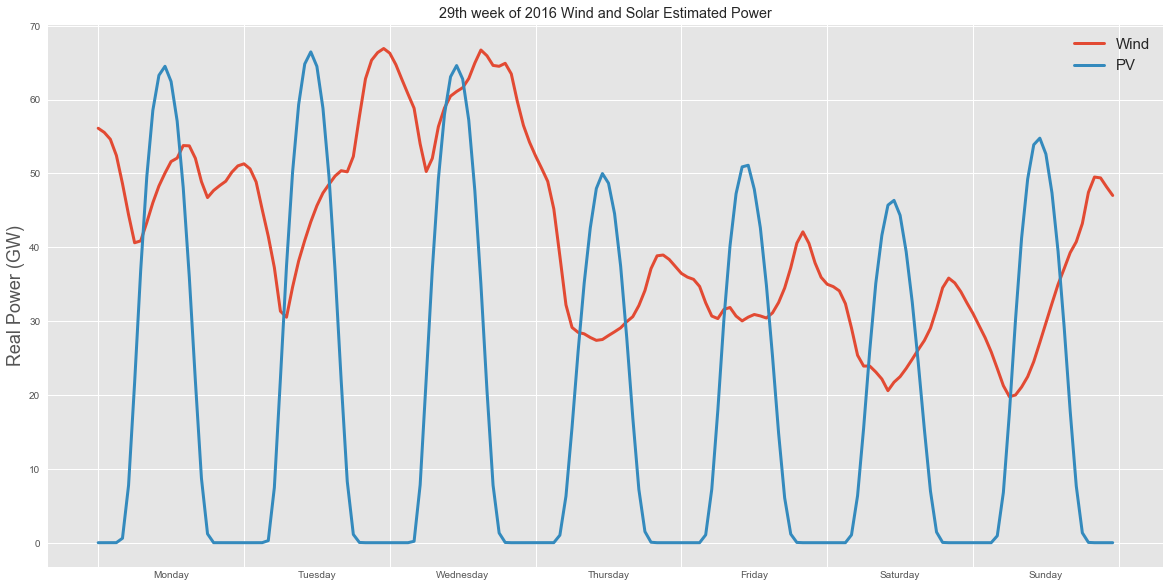

In [51]:
x = w_global_pandc['time']
y = w_global_pandc['wind_prod (GW)']
z = w_global_pandc['pv_prod (GW)']

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y, label='Wind', linewidth=3)
ax.plot(x, z, label='PV', linewidth=3)

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator(byhour = 12))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(DateFormatter('%A'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
    
#ax.set_xlabel('2016')
ax.autoscale_view()


plt.style.use('ggplot')
plt.title('29th week of 2016 Wind and Solar Estimated Power')
plt.ylabel("Real Power (GW)", fontsize=18)
ax.legend(prop={'size': 15})
plt.show()
#fig.savefig('/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/outputs_report/wind_prod.pdf')

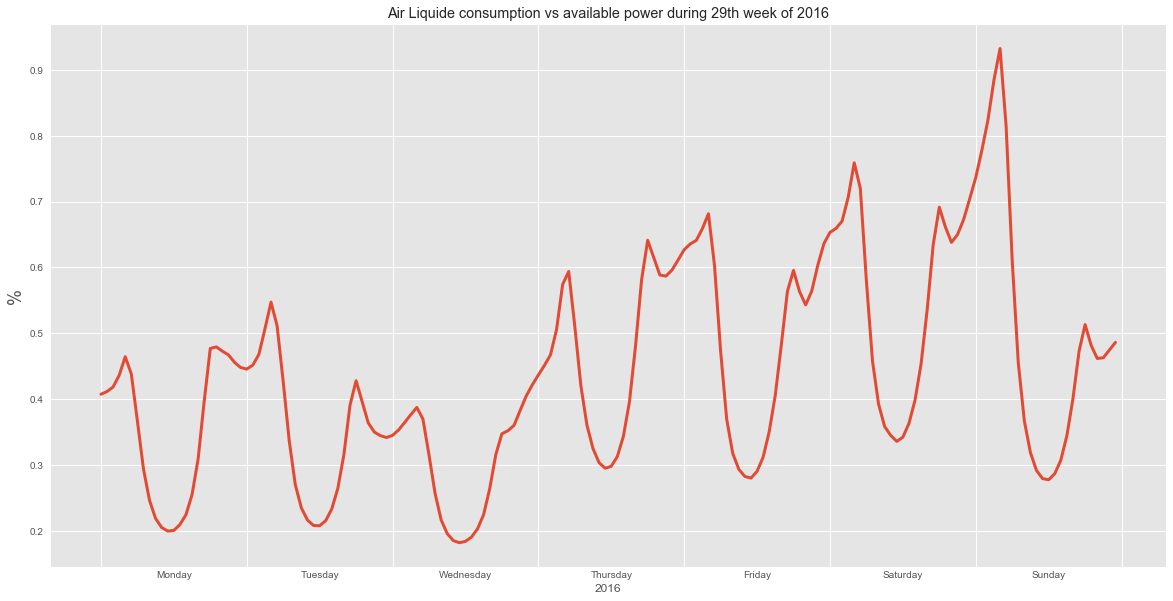

In [52]:
x = w_global_pandc['time']
y = w_global_pandc['poids_total (%)']

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y, linewidth=3)

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator(byhour = 12))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(DateFormatter('%A'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
    
ax.set_xlabel('2016')
#ax.xaxis.get_minor_ticks()[0].label1.set_visible(False)
#ax.xaxis.get_minor_ticks()[-1].label1.set_visible(False)
ax.autoscale_view()


plt.style.use('ggplot')
plt.title('Air Liquide consumption vs available power during 29th week of 2016')
plt.ylabel("%", fontsize=18)
plt.show()
#fig.savefig('/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/outputs_report/wind_prod.pdf')